<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.910836,96.100536,22.378050,85.598967,-0.000333,260.988056,260.987742,0.000313
1,0.0,1.0,76.897939,34.354512,28.213926,80.822793,-0.003327,230.285843,230.288562,-0.002719
2,0.0,2.0,78.562277,99.474345,62.607538,46.463133,-0.000672,297.106622,297.107312,-0.000690
3,0.0,3.0,31.696278,85.496340,49.750450,98.671881,0.000402,275.615352,275.614333,0.001019
4,0.0,4.0,38.741915,85.881408,65.339479,38.365998,-0.000083,238.328718,238.328915,-0.000198
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.385415,48.849140,29.190276,65.178954,-0.003653,211.600133,211.603633,-0.003501
59996,999.0,56.0,59.020118,62.654812,75.128222,47.392432,0.000920,254.196504,254.195182,0.001323
59997,999.0,57.0,29.585568,47.690278,34.220922,58.862919,0.000599,180.360286,180.359530,0.000756
59998,999.0,58.0,99.106588,82.748130,65.955843,94.549103,-0.000154,352.359511,352.359638,-0.000127


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.910836  96.100536  22.378050  85.598967 -0.000333  260.988056   
      1.0    76.897939  34.354512  28.213926  80.822793 -0.003327  230.285843   
      2.0    78.562277  99.474345  62.607538  46.463133 -0.000672  297.106622   
      3.0    31.696278  85.496340  49.750450  98.671881  0.000402  275.615352   
      4.0    38.741915  85.881408  65.339479  38.365998 -0.000083  238.328718   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.385415  48.849140  29.190276  65.178954 -0.003653  211.600133   
      56.0   59.020118  62.654812  75.128222  47.392432  0.000920  254.196504   
      57.0   29.585568  47.690278  34.220922  58.862919  0.000599  180.360286   
      58.0   99.106588  82.748130  65.955843  94.549103 -0.000154  352.359511   
      59.0   93.137068  35.468081  47.931243  30.389171 -0.000035  216.925528   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.987742  0.000313  
      1.0    230.288562 -0.002719  
      2.0    297.107312 -0.000690  
      3.0    275.614333  0.001019  
      4.0    238.328915 -0.000198  
...                 ...       ...  
999.0 55.0   211.603633 -0.003501  
      56.0   254.195182  0.001323  
      57.0   180.359530  0.000756  
      58.0   352.359638 -0.000127  
      59.0   216.924902  0.000626  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.910836  96.100536  22.378050  85.598967 -0.000333  260.988056   
      1.0    76.897939  34.354512  28.213926  80.822793 -0.003327  230.285843   
      2.0    78.562277  99.474345  62.607538  46.463133 -0.000672  297.106622   
      3.0    31.696278  85.496340  49.750450  98.671881  0.000402  275.615352   
      4.0    38.741915  85.881408  65.339479  38.365998 -0.000083  238.328718   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.385415  48.849140  29.190276  65.178954 -0.003653  211.600133   
      56.0   59.020118  62.654812  75.128222  47.392432  0.000920  254.196504   
      57.0   29.585568  47.690278  34.220922  58.862919  0.000599  180.360286   
      58.0   99.106588  82.748130  65.955843  94.549103 -0.000154  352.359511   
      59.0   93.137068  35.468081  47.931243  30.389171 -0.000035  216.925528   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.987742  0.000313  
      1.0    230.288562 -0.002719  
      2.0    297.107312 -0.000690  
      3.0    275.614333  0.001019  
      4.0    238.328915 -0.000198  
...                 ...       ...  
999.0 55.0   211.603633 -0.003501  
      56.0   254.195182  0.001323  
      57.0   180.359530  0.000756  
      58.0   352.359638 -0.000127  
      59.0   216.924902  0.000626  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.910836,96.100536,22.378050,85.598967,-0.000333,260.988056,260.987742,0.000313
1,0.0,1.0,76.897939,34.354512,28.213926,80.822793,-0.003327,230.285843,230.288562,-0.002719
2,0.0,2.0,78.562277,99.474345,62.607538,46.463133,-0.000672,297.106622,297.107312,-0.000690
3,0.0,3.0,31.696278,85.496340,49.750450,98.671881,0.000402,275.615352,275.614333,0.001019
4,0.0,4.0,38.741915,85.881408,65.339479,38.365998,-0.000083,238.328718,238.328915,-0.000198
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.385415,48.849140,29.190276,65.178954,-0.003653,211.600133,211.603633,-0.003501
59996,999.0,56.0,59.020118,62.654812,75.128222,47.392432,0.000920,254.196504,254.195182,0.001323
59997,999.0,57.0,29.585568,47.690278,34.220922,58.862919,0.000599,180.360286,180.359530,0.000756
59998,999.0,58.0,99.106588,82.748130,65.955843,94.549103,-0.000154,352.359511,352.359638,-0.000127


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.910836  96.100536  22.378050  85.598967 -0.000333  260.988056   
      1.0    76.897939  34.354512  28.213926  80.822793 -0.003327  230.285843   
      2.0    78.562277  99.474345  62.607538  46.463133 -0.000672  297.106622   
      3.0    31.696278  85.496340  49.750450  98.671881  0.000402  275.615352   
      4.0    38.741915  85.881408  65.339479  38.365998 -0.000083  238.328718   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.385415  48.849140  29.190276  65.178954 -0.003653  211.600133   
      56.0   59.020118  62.654812  75.128222  47.392432  0.000920  254.196504   
      57.0   29.585568  47.690278  34.220922  58.862919  0.000599  180.360286   
      58.0   99.106588  82.748130  65.955843  94.549103 -0.000154  352.359511   
      59.0   93.137068  35.468081  47.931243  30.389171 -0.000035  216.925528   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.987742  0.000313  
      1.0    230.288562 -0.002719  
      2.0    297.107312 -0.000690  
      3.0    275.614333  0.001019  
      4.0    238.328915 -0.000198  
...                 ...       ...  
999.0 55.0   211.603633 -0.003501  
      56.0   254.195182  0.001323  
      57.0   180.359530  0.000756  
      58.0   352.359638 -0.000127  
      59.0   216.924902  0.000626  

[60000 rows x 8 columns]

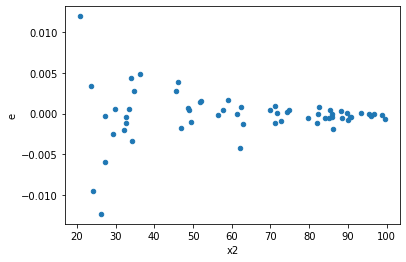

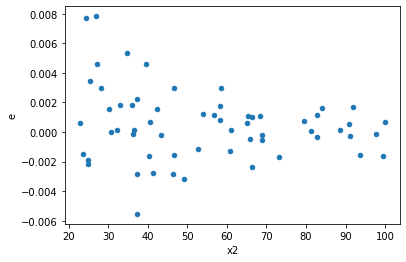

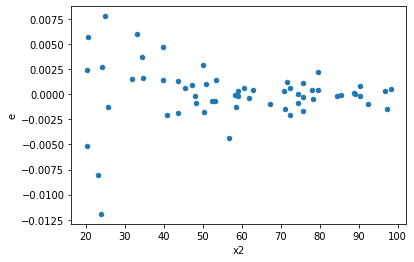

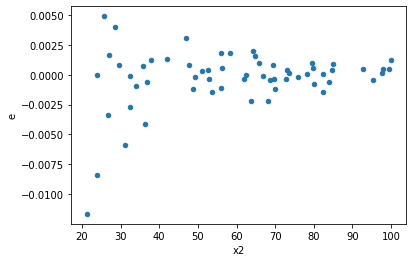

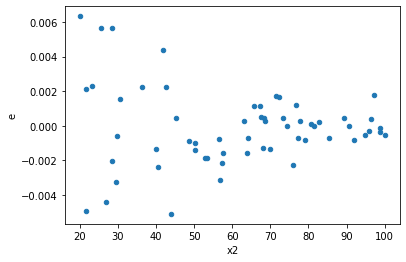

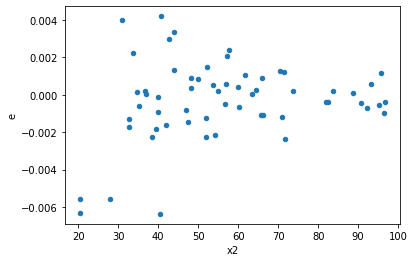

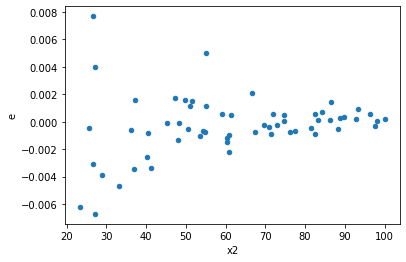

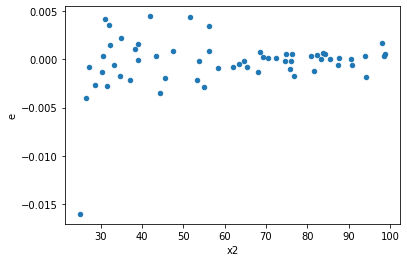

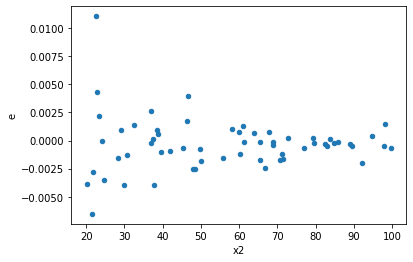

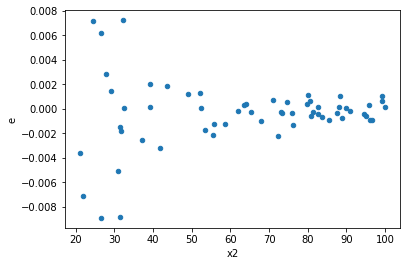

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,32.0,20.0,0.00017788726826970888,0.00022926913567081317,5.558977133428403e-06,1.1463456783540658e-05,2.062152174472207,0.09242566864324542,0.9537871656783773,0.04621283432162271,Reject001=1 : Homoscedasticity
3.0,28.0,24.0,6.924794494982131e-05,0.00013600554265702047,2.473140891065047e-06,5.666897610709186e-06,2.2913767796984517,0.04254049795778303,0.9787297510211085,0.021270248978891515,Reject001=1 : Homoscedasticity
4.0,24.0,28.0,1.9912333347049557e-05,0.0002099195595582669,8.296805561270648e-07,7.497127127080961e-06,9.03616105224573,1.689284505612676e-07,0.9999999155357747,8.44642252806338e-08,Reject001=0 : Heteroscedasticity
6.0,20.0,32.0,2.5512729798162948e-05,0.00021469249716611624,1.2756364899081475e-06,6.7091405364411326e-06,5.259445452931678,3.4068477002158204e-05,0.9999829657614989,1.7034238501079102e-05,Reject001=0 : Heteroscedasticity
8.0,29.0,23.0,6.60702694704479e-05,0.00019778109905783716,2.278285154153376e-06,8.599178219905964e-06,3.77440822288177,0.0017251711732364505,0.9991374144133818,0.0008625855866182253,Reject001=0 : Heteroscedasticity
10.0,33.0,19.0,9.911719824719502e-05,0.0001585099392052316,3.0035514620362126e-06,8.342628379222716e-06,2.777587960343105,0.02152455614722637,0.9892377219263868,0.010762278073613185,Reject001=1 : Homoscedasticity
12.0,19.0,33.0,0.0001322078199409242,0.0008897867259182415,6.958306312680221e-06,2.696323411873459e-05,3.874970848811169,0.0006499686673451244,0.9996750156663274,0.0003249843336725622,Reject001=0 : Heteroscedasticity
13.0,24.0,28.0,4.5546273501536984e-05,0.00035601917573586955,1.8977613958973743e-06,1.2714970561995341e-05,6.699983775348612,4.339802804675941e-06,0.9999978300985977,2.1699014023379704e-06,Reject001=0 : Heteroscedasticity
14.0,21.0,31.0,6.698355921855546e-05,0.0005947161835604221,3.1896932961216885e-06,1.9184393018078132e-05,6.0144945726926835,8.86510453401712e-06,0.999995567447733,4.43255226700856e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,32.0,20.0,0.0003515723662701896,0.00017356567288095325,1.0986636445943425e-05,8.678283644047662e-06,0.789894494711521,0.5384425556836733,Reject001=1 : Homoscedasticity
1.0,24.0,28.0,0.00016370157072370642,9.85178074338978e-05,6.820898780154434e-06,3.518493122639207e-06,0.5158401020223824,0.1034698993976729,Reject001=1 : Homoscedasticity
2.0,32.0,20.0,0.00017788726826970888,0.00022926913567081317,5.558977133428403e-06,1.1463456783540658e-05,2.062152174472207,0.09242566864324542,Reject001=1 : Homoscedasticity
3.0,28.0,24.0,6.924794494982131e-05,0.00013600554265702047,2.473140891065047e-06,5.666897610709186e-06,2.2913767796984517,0.04254049795778303,Reject001=1 : Homoscedasticity
4.0,24.0,28.0,1.9912333347049557e-05,0.0002099195595582669,8.296805561270648e-07,7.497127127080961e-06,9.03616105224573,1.689284505612676e-07,Reject001=0 : Heteroscedasticity
5.0,39.0,13.0,0.00016758393142952537,3.1623626290226174e-05,4.297023882808343e-06,2.4325866377097055e-06,0.5661096386831985,0.16984828091120854,Reject001=1 : Homoscedasticity
6.0,20.0,32.0,2.5512729798162948e-05,0.00021469249716611624,1.2756364899081475e-06,6.7091405364411326e-06,5.259445452931678,3.4068477002158204e-05,Reject001=0 : Heteroscedasticity
7.0,28.0,24.0,0.00028382119700856817,4.234935653889725e-05,1.0136471321734578e-05,1.7645565224540523e-06,0.17407996002223158,2.0824714018425124e-05,Reject001=0 : Heteroscedasticity
8.0,29.0,23.0,6.60702694704479e-05,0.00019778109905783716,2.278285154153376e-06,8.599178219905964e-06,3.77440822288177,0.0017251711732364505,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    568
Reject001=1 : Homoscedasticity      432
Name: Result_test, dtype: int64